In [1]:
#从文件中读入训练集和测试集数据
import numpy as np
X_train = np.loadtxt('u1.base')
X_train = X_train[:,0:3]
X_test = np.loadtxt('u1.test')
X_test = X_test[:,0:3]

In [2]:
#根据训练集数据填充原始评分矩阵R_train
R_train=np.zeros((943,1682))
for i in range(8000):
    uid=X_train[i,0]
    iid=X_train[i,1]
    rating=X_train[i,2]
    R_train[int(uid-1),int(iid-1)]=rating

In [3]:
#根据测试集数据填充原始评分矩阵R_test
R_test=np.zeros((943,1682))
for i in range(8000):
    uid=X_test[i,0]
    iid=X_test[i,1]
    rating=X_test[i,2]
    R_test[int(uid-1),int(iid-1)]=rating

In [4]:
#定义loss函数
def loss(R,P,Q,lamda=0.02):
    e=0
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                for k in range(K):
                    e = e + lamda * (pow(P[i][k],2) + pow(Q[k][j],2))
    return e

In [25]:
#定义训练函数
def matrix_factorization(R, R_t, P, Q, K, steps=1000, alpha=0.001, lamda=0.02, slowRate = 0.99):
    Loss=np.zeros((steps,1)) #初始化Loss
    num_it=0 #最终循环次数
    preRmse = 10000000.0 #初始化一个大一点的数
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (eij * Q[k][j] - lamda * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (eij * P[i][k] - lamda * Q[k][j])
        nowRmse=loss(R_t,P,Q) #计算根据本次循环得到的P，Q在测试集上的loss
        if nowRmse<preRmse: #如果本次循环得到的loss小于之前的loss，就更新之前的loss值
            preRmse = nowRmse
        elif nowRmse-preRmse<=0.01: #如果本次循环得到的loss比之前的loss增加量小于0.01，则记录最终循环次数为本次循环，跳出循环
            num_it=step
            break
        #在前面两种情况之外的，即本次的loss比之前loss大了超过0.01，意味着alpha过大，所以用alpha*=slowRate来减小alpha
        Loss[step]=nowRmse
        alpha*=slowRate
        num_it=steps

    return P, Q, Loss, num_it

In [26]:
K=3
P = np.random.rand(943,3)
Q = np.random.rand(3,1682) 
# 将X_train，X_test，随机初始化的P和Q，还有K传入训练函数进行训练
nP,nQ,L,n_it=matrix_factorization(R_train,R_test,P,Q,K)

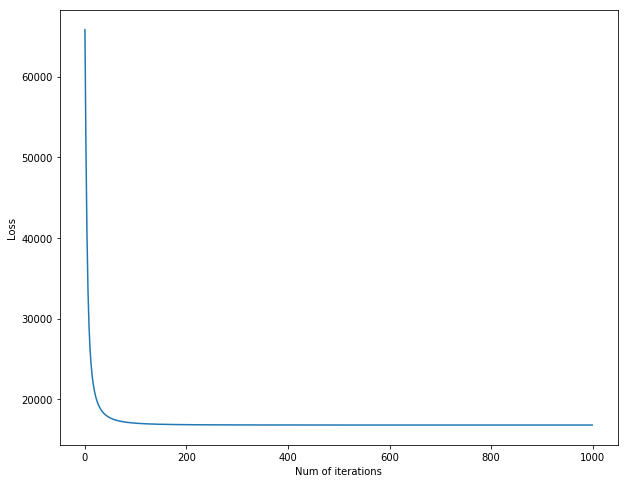

In [30]:
#绘制Loss随迭代次数变化的曲线图
import matplotlib.pyplot as plt
x=np.arange(0,n_it,1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(x,L)
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

In [31]:
# 根据训练得到的nP,nQ计算最终的评分预测矩阵R_pre
R_pre=nP.dot(nQ)
R_pre

array([[ 4.10504774,  3.12790163,  3.05809575, ...,  1.82131675,
         3.12353869,  3.04121157],
       [ 4.04741279,  3.2112296 ,  3.06324045, ...,  1.78852126,
         3.15132262,  3.06130588],
       [ 3.45228616,  2.53417137,  2.53820978, ...,  1.53201504,
         2.56731712,  2.51555771],
       ..., 
       [ 1.56403004,  1.0084095 ,  1.18580342, ...,  0.53881309,
         0.91706856,  1.24444749],
       [ 1.23272635,  0.89108823,  0.84058107, ...,  0.65924027,
         1.02324255,  0.77282543],
       [ 1.58140412,  1.4436257 ,  1.24075819, ...,  0.7386983 ,
         1.38957536,  1.23546614]])